In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
import itertools
import os
import cv2
import shutil
import random
import scipy
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import visualkeras
%matplotlib inline

In [2]:
relative_path = 'Dataset_split/'
train_path = relative_path + 'train'
valid_path = relative_path + 'val'
test_path = relative_path + 'test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=20)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=20, shuffle=False)

Found 8569 images belonging to 2 classes.
Found 2143 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [20]:
mobile = MobileNetV2()

In [21]:
mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [26]:
x = mobile.layers[-2].output
output = Dense(units=2, activation='sigmoid')(x)

In [27]:
model = Model(inputs=mobile.input, outputs=output)

In [28]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [29]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [32]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=100,
            verbose=1
)

Epoch 1/100
429/429 [==============================] - 147s 337ms/step - loss: 0.0314 - accuracy: 0.9888 - val_loss: 1.7180 - val_accuracy: 0.8348
Epoch 2/100
429/429 [==============================] - 145s 338ms/step - loss: 0.0312 - accuracy: 0.9893 - val_loss: 1.4346 - val_accuracy: 0.8306
Epoch 3/100
429/429 [==============================] - 145s 338ms/step - loss: 0.0247 - accuracy: 0.9910 - val_loss: 1.2907 - val_accuracy: 0.8348
Epoch 4/100
429/429 [==============================] - 145s 338ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 1.2107 - val_accuracy: 0.8357
Epoch 5/100
429/429 [==============================] - 145s 338ms/step - loss: 0.0274 - accuracy: 0.9907 - val_loss: 1.1633 - val_accuracy: 0.8353
Epoch 6/100
429/429 [==============================] - 145s 338ms/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 1.1334 - val_accuracy: 0.8353
Epoch 7/100
429/429 [==============================] - 145s 338ms/step - loss: 0.0281 - accuracy: 0.9897 - val_loss: 1

In [38]:
_, train_acc = model.evaluate(train_batches, verbose=1)
_, valid_acc = model.evaluate(valid_batches, verbose=1)

108/108 [==============================] - 28s 256ms/step - loss: 1.0714 - accuracy: 0.8325


In [39]:
print('Train Accuracy:', train_acc)
print('Valid Accuracy:', valid_acc)

Train Accuracy: 0.997082531452179
Valid Accuracy: 0.8324778079986572


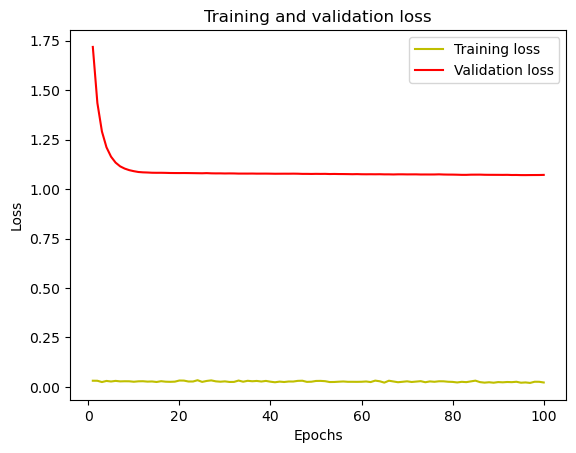

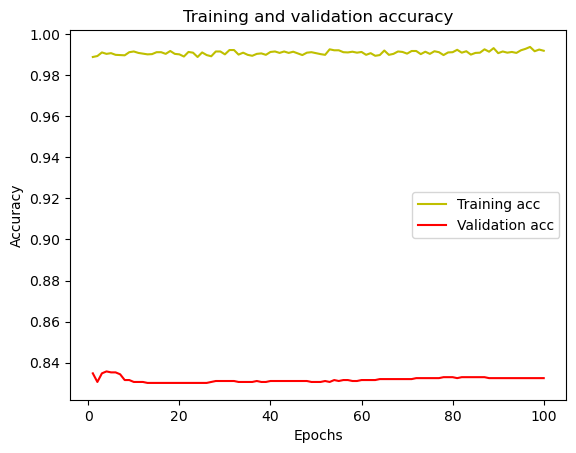

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
image_directory = 'Dataset_Phase1/'
size = 224
dataset = []
label = []

pneumothorax_images = os.listdir(image_directory + 'Pneumothorax/')
for i, image_name in enumerate(pneumothorax_images):
    image = cv2.imread(image_directory + 'Pneumothorax/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((size,size))
    dataset.append(np.array(image))
    label.append(1)
        
normal_images = os.listdir(image_directory + 'Normal/')
for i, image_name in enumerate(normal_images):
    image = cv2.imread(image_directory + 'Normal/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((size,size))
    dataset.append(np.array(image))
    label.append(0)

dataset = np.array(dataset)
label = np.array(label)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)
X_train = X_train/255.
X_test = X_test/255.

In [43]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

1/1 [==============================] - 0s 32ms/step
The prediction for this image is:  0
The actual label for this image is:  0


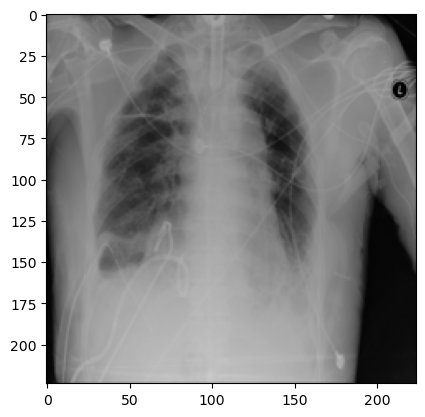

In [47]:
n=156
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", np.argmax(model.predict(input_img)))
print("The actual label for this image is: ", np.argmax(y_test[n]))

In [48]:
from matplotlib.patches import Rectangle
from skimage.feature.peak import peak_local_max

def plot_heatmap(img):
    pred = model.predict(np.expand_dims(img, axis=0))
    pred_class = np.argmax(pred)
    last_layer_weights = model.layers[-1].get_weights()[0]
    last_layer_weights_for_pred = last_layer_weights[:, pred_class]
    last_conv_model = Model(model.input, model.get_layer("out_relu").output)
    last_conv_output = last_conv_model.predict(img[np.newaxis,:,:,:])
    last_conv_output = np.squeeze(last_conv_output)
    
    h = int(img.shape[0]/last_conv_output.shape[0])
    w = int(img.shape[1]/last_conv_output.shape[1])
    upsampled_last_conv_output = scipy.ndimage.zoom(last_conv_output, (h, w, 1), order=1)
    
    heat_map = np.dot(upsampled_last_conv_output.reshape((img.shape[0]*img.shape[1], 1280)), 
                 last_layer_weights_for_pred).reshape(img.shape[0],img.shape[1])
    
    heat_map[img[:,:,0] == 0] = 0 
     
    peak_coords = peak_local_max(heat_map, num_peaks=5, threshold_rel=0.5, min_distance=10) 

    plt.imshow(img.astype('float32').reshape(img.shape[0],img.shape[1],3))
    plt.imshow(heat_map, cmap='jet', alpha=0.30)
    for i in range(0,peak_coords.shape[0]):
        print(i)
        y = peak_coords[i,0]
        x = peak_coords[i,1]
        plt.gca().add_patch(Rectangle((x-25, y-25), 50,50,linewidth=1,edgecolor='r',facecolor='none'))


67/67 [==============================] - 24s 360ms/step


<AxesSubplot:>

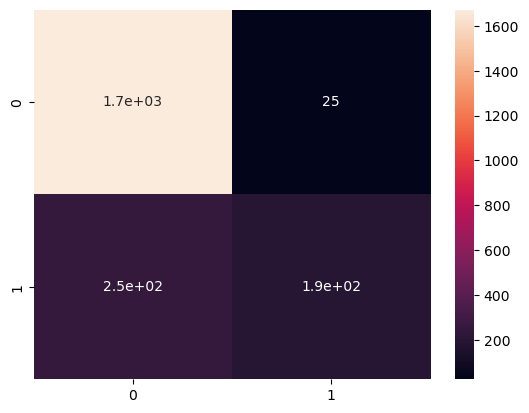

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True)

In [51]:
pneumothorax_images_idx = np.where(y_pred == 1)[0]

In [52]:
predicted_as_para = []
for i in pneumothorax_images_idx:
    pneu_img = X_test[i]
    predicted_as_para.append(pneu_img)
    
predicted_as_para = np.array(predicted_as_para)

1/1 [==============================] - 1s 507ms/step
0
1


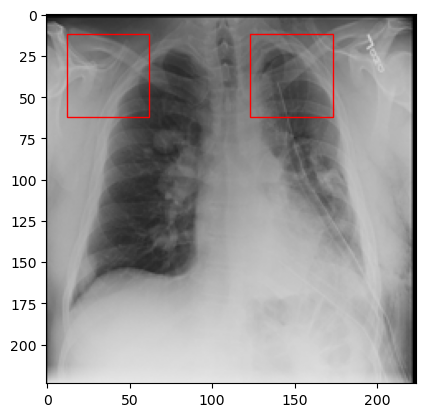

In [53]:
import random 
im = random.randint(0,predicted_as_para.shape[0]-1)
heat_map =plot_heatmap(predicted_as_para[im])

img = predicted_as_para[im]
plt.imshow(predicted_as_para[im])

In [54]:
test_labels = test_batches.classes

In [55]:
train_labels = train_batches.classes
valid_labels = valid_batches.classes

In [56]:
predictions_train = model.predict(train_batches, steps=len(train_batches), verbose=0)
predictions_valid = model.predict(valid_batches, steps=len(valid_batches), verbose=0)
predictions_test = model.predict(test_batches, steps=len(test_batches), verbose=0)

In [57]:
cm_train = confusion_matrix(y_true=train_labels, y_pred=predictions_train.argmax(axis=1))
cm_valid = confusion_matrix(y_true=valid_labels, y_pred=predictions_valid.argmax(axis=1))
cm_test = confusion_matrix(y_true=test_labels, y_pred=predictions_test.argmax(axis=1))

In [58]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment='center',
        color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
test_batches.class_indices

{'Normal': 0, 'Pneumothorax': 1}

Confusion matrix, without normalization
[[5158 1508]
 [1503  400]]


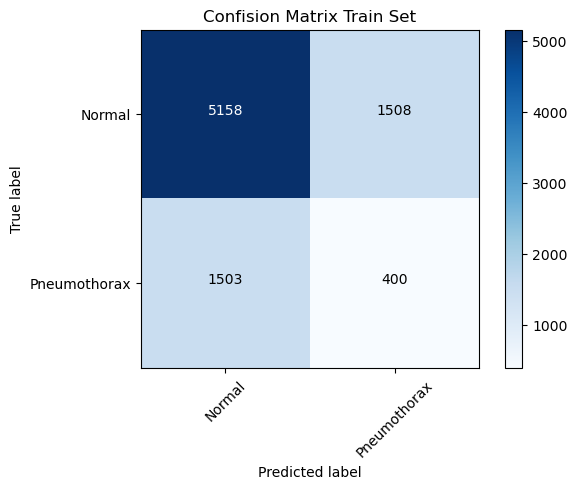

In [60]:
cm_plot_labels = ['Normal', 'Pneumothorax']
plot_confusion_matrix(cm=cm_train, classes=cm_plot_labels, title='Confision Matrix Train Set')

Confusion matrix, without normalization
[[1304  363]
 [ 394   82]]


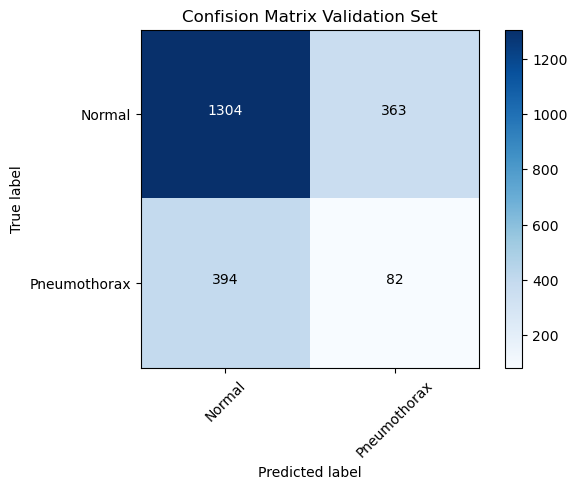

In [61]:
plot_confusion_matrix(cm=cm_valid, classes=cm_plot_labels, title='Confision Matrix Validation Set')

Confusion matrix, without normalization
[[47  1]
 [ 2 46]]


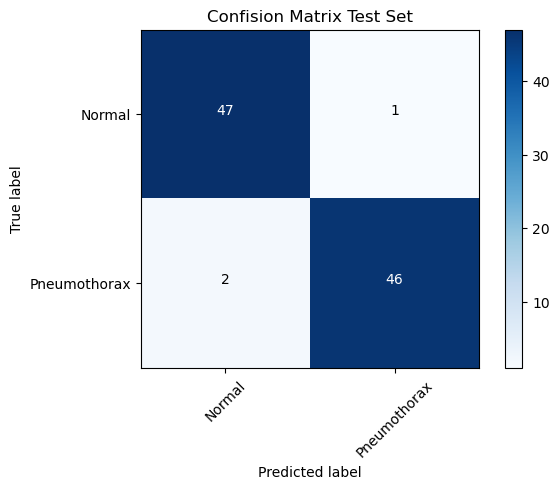

In [62]:
plot_confusion_matrix(cm=cm_test, classes=cm_plot_labels, title='Confision Matrix Test Set')

In [63]:
_, test_acc = model.evaluate(test_batches, verbose=1)
print('Test accuracy: ', test_acc)

5/5 [==============================] - 1s 249ms/step - loss: 0.2052 - accuracy: 0.9688
Test accuracy:  0.96875


In [ ]:
model.save('mobile_net4_model.h5')

In [5]:
loaded_model = tf.keras.models.load_model('Desktop/mobile_net4_model.h5')
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

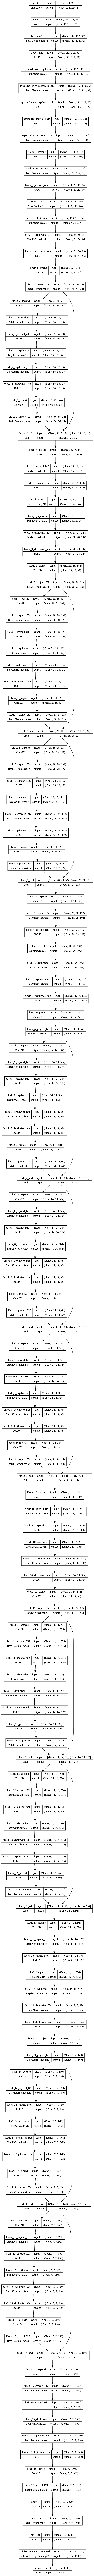

In [7]:
plot_model(loaded_model, to_file='mobilenet_plot.png', show_shapes=True, show_layer_names=True)

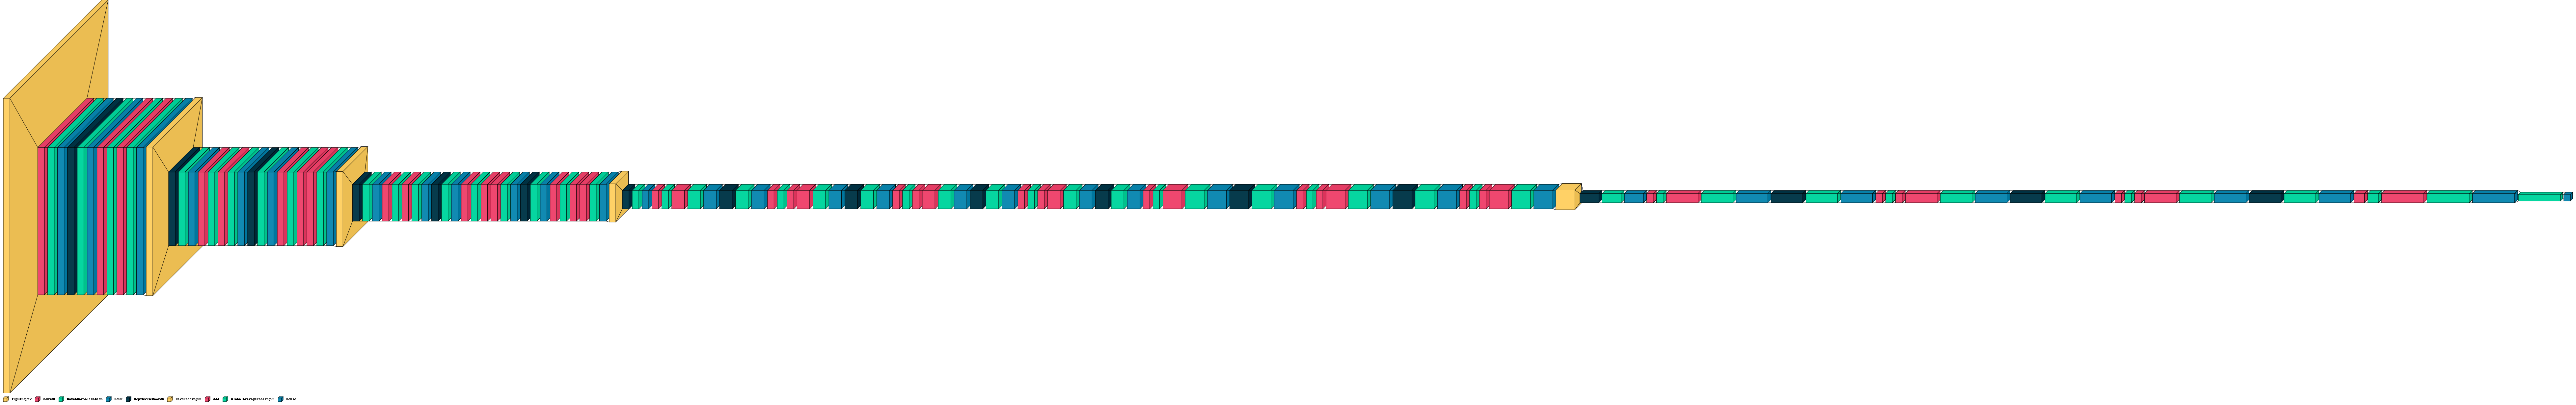

In [8]:
visualkeras.layered_view(loaded_model, legend=True) 